Dataset:
          timestamp           device  energy
0  2024-01-01 08:00               AC     1.5
1  2024-01-01 08:00           Fridge     0.3
2  2024-01-01 09:00               AC     1.8
3  2024-01-01 09:00           Fridge     0.4
4  2024-01-01 10:00               TV     0.6
5  2024-01-01 10:00              Fan     0.2
6  2024-01-01 11:00  Washing Machine     1.2
7  2024-01-01 11:00            Light     0.1


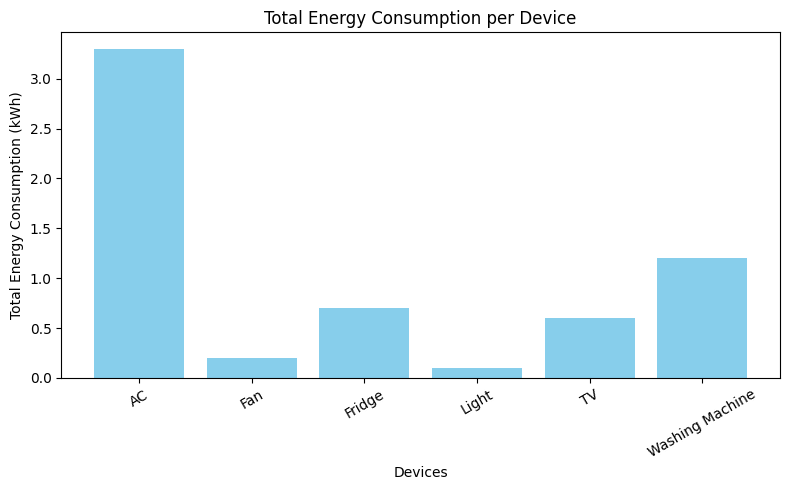

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# -----------------------------
# Dataset with Multiple Devices
# -----------------------------
data = pd.DataFrame({
    "timestamp": [
        "2024-01-01 08:00", "2024-01-01 08:00",
        "2024-01-01 09:00", "2024-01-01 09:00",
        "2024-01-01 10:00", "2024-01-01 10:00",
        "2024-01-01 11:00", "2024-01-01 11:00"
    ],
    "device": [
        "AC", "Fridge",
        "AC", "Fridge",
        "TV", "Fan",
        "Washing Machine", "Light"
    ],
    "energy": [1.5, 0.3, 1.8, 0.4, 0.6, 0.2, 1.2, 0.1]
})

print("Dataset:")
print(data)

# -----------------------------
# Data Preprocessing
# -----------------------------
data["timestamp"] = pd.to_datetime(data["timestamp"])
data["hour"] = data["timestamp"].dt.hour
data["device_code"] = data["device"].astype("category").cat.codes

X = data[["hour", "device_code"]]
y = data["energy"]

# -----------------------------
# Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# -----------------------------
# Model Training
# -----------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# -----------------------------
# Prediction
# -----------------------------
y_pred = model.predict(X_test)

# -----------------------------
# BAR CHART: Total Energy Consumption per Device
# -----------------------------
device_energy = data.groupby("device")["energy"].sum()

plt.figure(figsize=(8,5))
plt.bar(device_energy.index, device_energy.values, color="skyblue")
plt.xlabel("Devices")
plt.ylabel("Total Energy Consumption (kWh)")
plt.title("Total Energy Consumption per Device")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
